In [1]:
!pip install openpyxl

In [2]:
from openpyxl import Workbook

엑셀을 다루는 패키지, 모듈

In [3]:
wb = Workbook()

In [4]:
wb.sheetnames

['Sheet']

In [5]:
wb.create_sheet("new_sheet2")

<Worksheet "new_sheet2">

In [6]:
wb.create_sheet("new_sheet1", 1)

<Worksheet "new_sheet1">

시트의 위치도 지정가능, 1번

In [7]:
wb.sheetnames

['Sheet', 'new_sheet1', 'new_sheet2']

In [8]:
ws = wb['Sheet']

작업할 시트 선택

In [9]:
ws.title

'Sheet'

In [10]:
ws.title = '주소록'

시트 이름 변경

In [11]:
wb.sheetnames

['주소록', 'new_sheet1', 'new_sheet2']

In [12]:
ws['A1'] = '이름'
ws['B1'] = '전화번호'
ws['A2'] = '홍길동'
ws['B2'] = '7777'

내용 입력

In [13]:
ws.cell(row=3, column=1, value="홍길순")
ws.cell(row=3, column=2, value="2222")

<Cell '주소록'.B3>

또 다른 내용 입력 방법

In [14]:
ws.cell(row=3, column=1).value = '홍길순'
ws.cell(row=3, column=2).value = '2222'

같은 방법

In [15]:
ws.cell(3, 1).value

'홍길순'

셀 내용 확인

In [16]:
wb.save('address.xlsx')

엑셀파일 저장

저장한 엑셀파일 .zip 확장자로 변경하여 엑세파일의 구성요소 확인가능

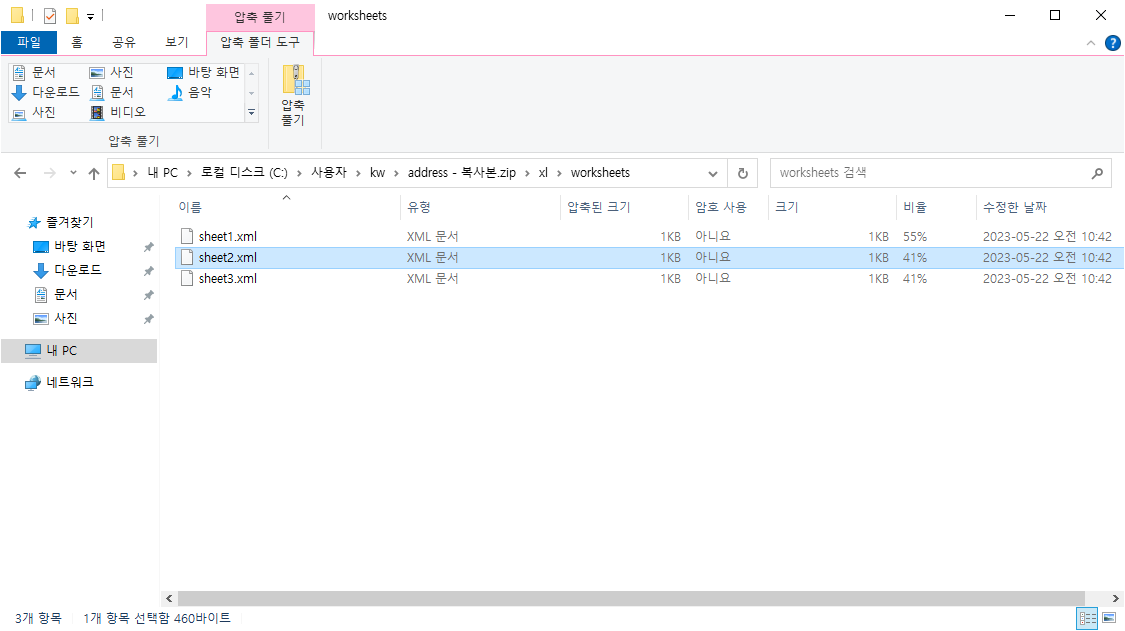

In [17]:
from openpyxl import load_workbook

wb2 = load_workbook('address.xlsx')
wb2.sheetnames

['주소록', 'new_sheet1', 'new_sheet2']

엑셀파일 불러오기

In [18]:
sheet = wb2['주소록']
sheet['A1'].value

'이름'

In [19]:
import pandas as pd

pd.read_csv

csv는 순수하게 데이터만 있음

pd.read_excel

여기서는 엑셀다룸

그외에도 json, pdf, html 등 다양함

In [20]:
df = pd.read_excel('address.xlsx')

In [21]:
df

,이름,전화번호
0,홍길동,7777
1,홍길순,2222


In [22]:
type(df)

pandas.core.frame.DataFrame

In [23]:
df.values

array([['홍길동', 7777],
       ['홍길순', 2222]], dtype=object)

넘파이 배열 형식으로 꺼낼수도 있음

In [24]:
type(df.values)

numpy.ndarray

In [25]:
df['전화번호']

0    7777
1    2222
Name: 전화번호, dtype: int64

In [26]:
df.loc[0]

이름       홍길동
전화번호    7777
Name: 0, dtype: object

In [27]:
type(df['전화번호'])

pandas.core.series.Series

여러가지 방식으로 데이터 꺼낼 수 있음

In [28]:
df.to_csv('address.csv')

csv 파일로 바꿔 저장, 기본적으로 csv파일은 엑셀과 메모장으로도 볼 수 있음
그러나 엑셀은 한글이 안보이고 메모장은 잘보임
엑셀파일은 기본적으로 utf-8로 인코딩되어있는 파일 읽지못함
그래서 파일 인코딩을 cp949(ANSI)로 바꾸면 엑셀로 한글 읽을 수 있음
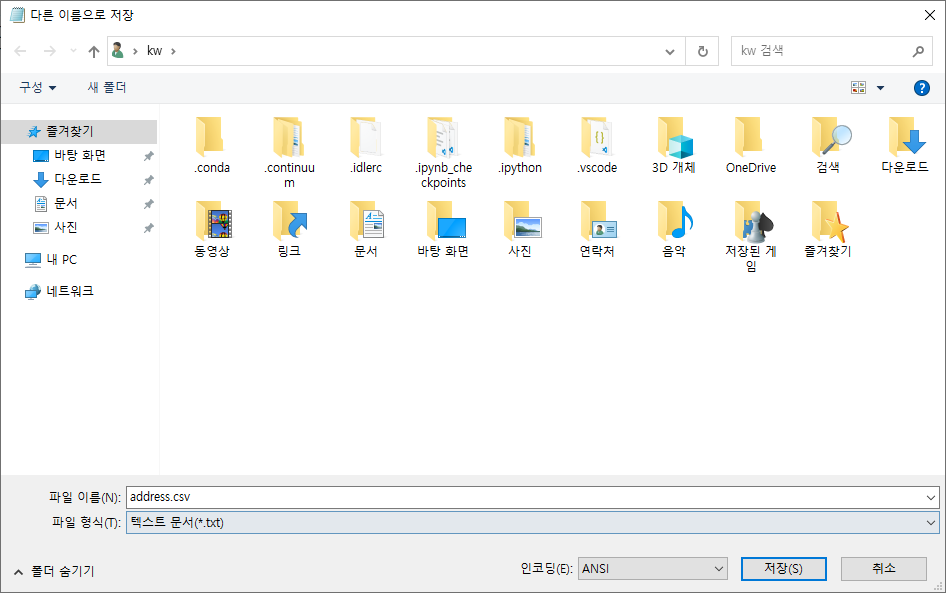

## 엑셀 속성 다루기

In [29]:
ws

<Worksheet "주소록">

In [30]:
ws.column_dimensions['A'].width = 20

엑셀에서 'A' column의 칸 너비를 20으로 늘림

In [31]:
wb.save('address.xlsx')

In [32]:
ws['A4'] = 123456789

In [33]:
wb.save('address.xlsx')

In [34]:
from openpyxl.styles import PatternFill
fill = PatternFill(start_color='eff7f7', fill_type='solid')
ws['A1'].fill = fill

In [35]:
wb.save('address.xlsx')

cell 색깔 변경

In [36]:
from openpyxl.styles import Font, colors

In [37]:
font = Font(name='휴먼편지체', size=11, color=colors.BLUE, italic=True)

In [38]:
ws['A2'].font = font

In [39]:
wb.save('address.xlsx')

cell 폰트 변경